## Wine Quality Project

In this data science project, we will explore the wine dataset for red wine quality. The objective is to explore which chemical properties influence the quality of red wines and also build a machine learning algorithm that would correctly predict the quality of wine.

You are expected to use all the different machine learning algorithms and methods that you know and choose the best performing model. 

**Important**
At the end of this project, write a short report in a markdown cell below your notebook detailing your findings from EDA, data cleaning, feature selection and modelling.

The dataset and data description are publicly available [here](https://archive.ics.uci.edu/ml/datasets/wine+quality) for download.

Submit before 5pm Sunday, 25 Oct. 2020.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler 
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn import metrics
%matplotlib inline

In [2]:
wine = pd.read_csv(r"C:\Users\hp user\Desktop\Exercises and solutions\Exercises\winequality-red.csv", sep = ';')
wine.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


In [3]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [4]:
wine.shape

(1599, 12)

In [5]:
wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [6]:
wine.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

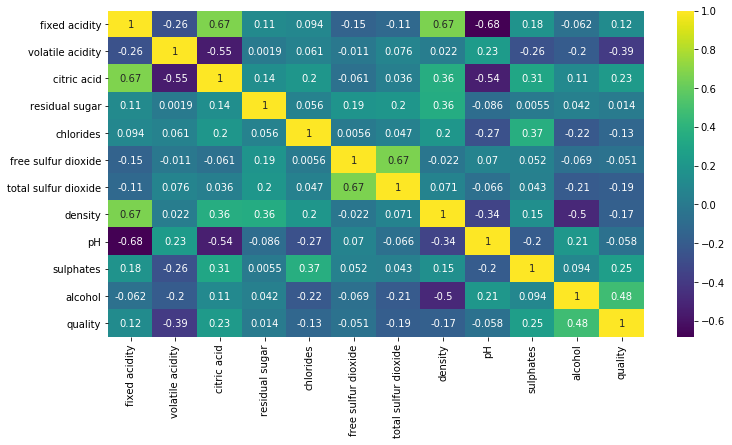

In [7]:
plt.figure(figsize=(12,6))
sns.heatmap(wine.corr(),cmap='viridis', annot=True)

In [8]:
#Dependent and independent 

y = wine['quality']
X = wine.drop(['quality'], axis = 1)

In [9]:
#5-Interaction among features
#here we make combo with featrues/columns, function take one column and multipcation with another one
from itertools import combinations
from sklearn.preprocessing import PolynomialFeatures
   
def add_interations(X):
    # Get features/columns names
    combos = list(combinations(list(X.columns), 2))
    colnames = list(X.columns) + ['_'.join(x) for x in combos]
        
    # Find interations
    poly = PolynomialFeatures(interaction_only=True, include_bias=False)
    X = poly.fit_transform(X)
    X = pd.DataFrame(X)
    X.columns = colnames
        
    return X
    
X = add_interations(X)
print(X.shape)

(1599, 66)


In [10]:
wine = pd.concat([X,y], axis =1)

In [11]:
corr = wine.corr()['quality'].abs()
drop_corr = corr[corr<0.3]
wine = wine.drop(drop_corr.index, axis = 1)

In [12]:
y = wine['quality']
X = wine.drop(['quality', 'volatile acidity', 'alcohol'], axis = 1)

In [13]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns = X.columns)
X.head()

,fixed acidity_volatile acidity,fixed acidity_alcohol,volatile acidity_density,volatile acidity_pH,density_alcohol,pH_alcohol,sulphates_alcohol
0,0.370985,0.114878,0.398688,0.399898,0.152159,0.319718,0.137857
1,0.522916,0.151267,0.521754,0.470005,0.212339,0.261477,0.223218
2,0.438470,0.151267,0.439493,0.403921,0.212642,0.282435,0.205292
3,0.186575,0.327498,0.110158,0.092876,0.214157,0.247505,0.163466
4,0.370985,0.114878,0.398688,0.399898,0.152159,0.319718,0.137857


In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [15]:
X.head()

,fixed acidity_volatile acidity,fixed acidity_alcohol,volatile acidity_density,volatile acidity_pH,density_alcohol,pH_alcohol,sulphates_alcohol
0,0.370985,0.114878,0.398688,0.399898,0.152159,0.319718,0.137857
1,0.522916,0.151267,0.521754,0.470005,0.212339,0.261477,0.223218
2,0.438470,0.151267,0.439493,0.403921,0.212642,0.282435,0.205292
3,0.186575,0.327498,0.110158,0.092876,0.214157,0.247505,0.163466
4,0.370985,0.114878,0.398688,0.399898,0.152159,0.319718,0.137857


In [16]:
y.value_counts(normalize=True)*100

5    42.589118
6    39.899937
7    12.445278
4     3.314572
8     1.125704
3     0.625391
Name: quality, dtype: float64

# Training model

In [17]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
model = log_reg.fit(X_train, y_train)
test_predictions = model.predict(X_test)
train_predictions = model.predict(X_train)

In [18]:
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score, classification_report

#test classification report
test_report = classification_report(y_test, test_predictions)

#train classification report
train_report = classification_report(y_train, train_predictions)

#output
print("The train classification report")
print(train_report)
print(confusion_matrix(y_train, train_predictions))
print("------------------------------------------------------")
print("------------------------------------------------------")
print("------------------------------------------------------")

print("The test classification report")
print(test_report)
print(confusion_matrix(y_test, test_predictions))

The train classification report
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         9
           4       0.00      0.00      0.00        40
           5       0.62      0.77      0.69       541
           6       0.52      0.55      0.53       504
           7       0.58      0.25      0.35       169
           8       0.00      0.00      0.00        16

    accuracy                           0.58      1279
   macro avg       0.29      0.26      0.26      1279
weighted avg       0.54      0.58      0.55      1279

[[  0   0   8   1   0   0]
 [  0   0  28  12   0   0]
 [  0   0 417 122   2   0]
 [  0   0 203 277  24   0]
 [  0   0  14 113  42   0]
 [  0   0   0  11   5   0]]
------------------------------------------------------
------------------------------------------------------
------------------------------------------------------
The test classification report
              precision    recall  f1-score   support

           

C:\Users\hp user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Support vector machine model

In [19]:
from sklearn.svm import SVC

model = SVC(C=100, gamma=1)

svmodel = model.fit(X_train, y_train)
train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)

In [20]:
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score, classification_report

#test classification report
test_report = classification_report(y_test, test_predictions)

#train classification report
train_report = classification_report(y_train, train_predictions)

#output
print("The train classification report")
print(train_report)
print(confusion_matrix(y_train, train_predictions))
print("------------------------------------------------------")
print("------------------------------------------------------")
print("------------------------------------------------------")

print("The test classification report")
print(test_report)
print(confusion_matrix(y_test, test_predictions))

The train classification report
              precision    recall  f1-score   support

           3       1.00      0.11      0.20         9
           4       1.00      0.05      0.10        40
           5       0.64      0.79      0.70       541
           6       0.55      0.57      0.56       504
           7       0.68      0.33      0.44       169
           8       0.00      0.00      0.00        16

    accuracy                           0.60      1279
   macro avg       0.64      0.31      0.33      1279
weighted avg       0.61      0.60      0.58      1279

[[  1   0   7   1   0   0]
 [  0   2  28  10   0   0]
 [  0   0 426 114   1   0]
 [  0   0 197 288  19   0]
 [  0   0  12 102  55   0]
 [  0   0   0  10   6   0]]
------------------------------------------------------
------------------------------------------------------
------------------------------------------------------
The test classification report
              precision    recall  f1-score   support

           

C:\Users\hp user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [21]:
param_grid = {'C': [100,1000], 'gamma': [1, 0.1, 0.01], 'kernel':['rbf']}

from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)

grid.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV] C=100, gamma=1, kernel=rbf ......................................
[CV] .......... C=100, gamma=1, kernel=rbf, score=0.594, total=   0.2s
[CV] C=100, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[CV] .......... C=100, gamma=1, kernel=rbf, score=0.566, total=   0.2s
[CV] C=100, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.4s remaining:    0.0s


[CV] .......... C=100, gamma=1, kernel=rbf, score=0.594, total=   0.3s
[CV] C=100, gamma=1, kernel=rbf ......................................
[CV] .......... C=100, gamma=1, kernel=rbf, score=0.562, total=   0.2s
[CV] C=100, gamma=1, kernel=rbf ......................................
[CV] .......... C=100, gamma=1, kernel=rbf, score=0.600, total=   0.3s
[CV] C=100, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=100, gamma=0.1, kernel=rbf, score=0.594, total=   0.2s
[CV] C=100, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=100, gamma=0.1, kernel=rbf, score=0.531, total=   0.2s
[CV] C=100, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=100, gamma=0.1, kernel=rbf, score=0.602, total=   0.2s
[CV] C=100, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=100, gamma=0.1, kernel=rbf, score=0.578, total=   0.3s
[CV] C=100, gamma=0.1, kernel=rbf ....................................
[CV] .

[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:   12.3s finished


GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [100, 1000], 'gamma': [1, 0.1, 0.01],
                         'kernel': ['rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [22]:
grid.best_params_

{'C': 100, 'gamma': 1, 'kernel': 'rbf'}

In [23]:
grid.best_estimator_

SVC(C=100, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf', max_iter=-1,
    probability=False, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

# Decision tree

In [24]:
from sklearn.tree import DecisionTreeClassifier

In [50]:
model = DecisionTreeClassifier(max_depth=3, random_state=42)
model.fit(X_train, y_train)
train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)

In [51]:
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score, classification_report

#test classification report
test_report = accuracy_score(y_test, test_predictions)

#train classification report
train_report = accuracy_score(y_train, train_predictions)

#output
print("The train score")
print(train_report)
print("------------------------------------------------------")
print("------------------------------------------------------")
print("------------------------------------------------------")

print("The test score")
print(test_report)

The train score
0.6059421422986708
------------------------------------------------------
------------------------------------------------------
------------------------------------------------------
The test score
0.61875


In [27]:
params = {'max_depth':[1,2,3,4,5,6,7], 'criterion':['gini','entropy']}

grid = GridSearchCV(DecisionTreeClassifier(), param_grid=params, cv = 3, verbose = 2)

grid.fit(X_train, y_train)

Fitting 3 folds for each of 14 candidates, totalling 42 fits
[CV] criterion=gini, max_depth=1 .....................................
[CV] ...................... criterion=gini, max_depth=1, total=   0.0s
[CV] criterion=gini, max_depth=1 .....................................
[CV] ...................... criterion=gini, max_depth=1, total=   0.0s
[CV] criterion=gini, max_depth=1 .....................................
[CV] ...................... criterion=gini, max_depth=1, total=   0.0s
[CV] criterion=gini, max_depth=2 .....................................
[CV] ...................... criterion=gini, max_depth=2, total=   0.0s
[CV] criterion=gini, max_depth=2 .....................................
[CV] ...................... criterion=gini, max_depth=2, total=   0.0s
[CV] criterion=gini, max_depth=2 .....................................
[CV] ...................... criterion=gini, max_depth=2, total=   0.0s
[CV] criterion=gini, max_depth=3 .....................................
[CV] ...........

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s



[CV] criterion=gini, max_depth=3 .....................................
[CV] ...................... criterion=gini, max_depth=3, total=   0.0s
[CV] criterion=gini, max_depth=4 .....................................
[CV] ...................... criterion=gini, max_depth=4, total=   0.0s
[CV] criterion=gini, max_depth=4 .....................................
[CV] ...................... criterion=gini, max_depth=4, total=   0.0s
[CV] criterion=gini, max_depth=4 .....................................
[CV] ...................... criterion=gini, max_depth=4, total=   0.0s
[CV] criterion=gini, max_depth=5 .....................................
[CV] ...................... criterion=gini, max_depth=5, total=   0.0s
[CV] criterion=gini, max_depth=5 .....................................
[CV] ...................... criterion=gini, max_depth=5, total=   0.0s
[CV] criterion=gini, max_depth=5 .....................................
[CV] ...................... criterion=gini, max_depth=5, total=   0.0s
[CV] 

[Parallel(n_jobs=1)]: Done  42 out of  42 | elapsed:    1.0s finished


GridSearchCV(cv=3, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'criterion': ['gini', 'entropy'],
                   

In [28]:
grid.best_params_

{'criterion': 'entropy', 'max_depth': 5}

# Random Forest

In [44]:
from sklearn.ensemble import RandomForestClassifier

rand = RandomForestClassifier(max_depth=3,n_estimators=150,random_state=1)
rand.fit(X_train, y_train)
test_predictions = rand.predict(X_test)
train_predictions = rand.predict(X_train)

In [45]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

#test classification report
test_report = accuracy_score(y_test, test_predictions)

#train classification report
train_report = accuracy_score(y_train, train_predictions)

#output
print("The train score")
print(train_report)
print("------------------------------------------------------")
print("------------------------------------------------------")
print("------------------------------------------------------")

print("The test score")
print(test_report)

The train score
0.6075058639562158
------------------------------------------------------
------------------------------------------------------
------------------------------------------------------
The test score
0.621875


In [31]:
from sklearn.model_selection import GridSearchCV

In [32]:
params = {'n_estimators':[50,100,150,200], 'max_depth':[1,2,3], 'criterion':['gini', 'entropy']}

grid = GridSearchCV(RandomForestClassifier(), param_grid=params, cv = 3, verbose = 2)

grid.fit(X_train, y_train)

Fitting 3 folds for each of 24 candidates, totalling 72 fits
[CV] criterion=gini, max_depth=1, n_estimators=50 ....................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ..... criterion=gini, max_depth=1, n_estimators=50, total=   0.4s
[CV] criterion=gini, max_depth=1, n_estimators=50 ....................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s


[CV] ..... criterion=gini, max_depth=1, n_estimators=50, total=   0.2s
[CV] criterion=gini, max_depth=1, n_estimators=50 ....................
[CV] ..... criterion=gini, max_depth=1, n_estimators=50, total=   0.2s
[CV] criterion=gini, max_depth=1, n_estimators=100 ...................
[CV] .... criterion=gini, max_depth=1, n_estimators=100, total=   0.4s
[CV] criterion=gini, max_depth=1, n_estimators=100 ...................
[CV] .... criterion=gini, max_depth=1, n_estimators=100, total=   0.4s
[CV] criterion=gini, max_depth=1, n_estimators=100 ...................
[CV] .... criterion=gini, max_depth=1, n_estimators=100, total=   0.5s
[CV] criterion=gini, max_depth=1, n_estimators=150 ...................
[CV] .... criterion=gini, max_depth=1, n_estimators=150, total=   0.8s
[CV] criterion=gini, max_depth=1, n_estimators=150 ...................
[CV] .... criterion=gini, max_depth=1, n_estimators=150, total=   0.6s
[CV] criterion=gini, max_depth=1, n_estimators=150 ...................
[CV] .

[CV] . criterion=entropy, max_depth=2, n_estimators=200, total=   1.2s
[CV] criterion=entropy, max_depth=3, n_estimators=50 .................
[CV] .. criterion=entropy, max_depth=3, n_estimators=50, total=   0.3s
[CV] criterion=entropy, max_depth=3, n_estimators=50 .................
[CV] .. criterion=entropy, max_depth=3, n_estimators=50, total=   0.4s
[CV] criterion=entropy, max_depth=3, n_estimators=50 .................
[CV] .. criterion=entropy, max_depth=3, n_estimators=50, total=   0.3s
[CV] criterion=entropy, max_depth=3, n_estimators=100 ................
[CV] . criterion=entropy, max_depth=3, n_estimators=100, total=   0.6s
[CV] criterion=entropy, max_depth=3, n_estimators=100 ................
[CV] . criterion=entropy, max_depth=3, n_estimators=100, total=   0.5s
[CV] criterion=entropy, max_depth=3, n_estimators=100 ................
[CV] . criterion=entropy, max_depth=3, n_estimators=100, total=   0.5s
[CV] criterion=entropy, max_depth=3, n_estimators=150 ................
[CV] .

[Parallel(n_jobs=1)]: Done  72 out of  72 | elapsed:   46.4s finished


GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [33]:
grid.best_params_

{'criterion': 'entropy', 'max_depth': 3, 'n_estimators': 200}

# KNearestNeigbors

In [34]:
from sklearn.neighbors import KNeighborsClassifier

In [35]:
k_range = range(1, 50)
scores = {}
scores_list = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    train_pred = knn.predict(X_train)
    scores[k] = accuracy_score(y_test, y_pred)
    scores_list.append(accuracy_score(y_test, y_pred))
    print("{}---> {:.3f}".format(k,(accuracy_score(y_test, y_pred)*100)))

1---> 61.250
2---> 54.375
3---> 54.688
4---> 61.562
5---> 59.688
6---> 62.813
7---> 63.125
8---> 65.625
9---> 65.000
10---> 66.250
11---> 61.562
12---> 60.625
13---> 61.250
14---> 60.938
15---> 60.938
16---> 60.312
17---> 62.500
18---> 60.938
19---> 61.562
20---> 60.312
21---> 60.938
22---> 60.625
23---> 58.750
24---> 60.000
25---> 61.250
26---> 61.562
27---> 62.187
28---> 62.187
29---> 62.187
30---> 62.187
31---> 62.813
32---> 63.438
33---> 63.750
34---> 62.500
35---> 62.187
36---> 62.813
37---> 61.562
38---> 62.187
39---> 61.562
40---> 61.875
41---> 60.312
42---> 61.250
43---> 60.312
44---> 60.312
45---> 58.750
46---> 58.438
47---> 58.750
48---> 59.375
49---> 59.375


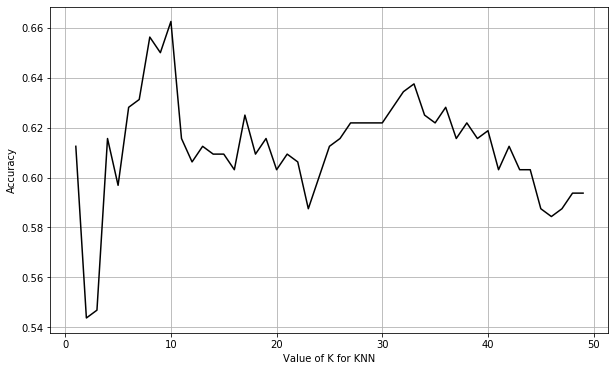

In [36]:
plt.figure(figsize = (10, 6))
plt.plot(k_range, scores_list, c = 'k')
plt.xlabel('Value of K for KNN')
plt.ylabel('Accuracy')
plt.grid(True)

In [37]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

knn = KNeighborsClassifier(n_neighbors = 10)
knn.fit(X_train,y_train)
test_predictions = knn.predict(X_test)
train_predictions = knn.predict(X_train)
#test classification report
test_report = accuracy_score(y_test, test_predictions)

#train classification report
train_report = accuracy_score(y_train, train_predictions)

#output
print("The train score")
print(train_report)
print("------------------------------------------------------")
print("------------------------------------------------------")
print("------------------------------------------------------")

print("The test score")
print(test_report)

The train score
0.63721657544957
------------------------------------------------------
------------------------------------------------------
------------------------------------------------------
The test score
0.6625


# Report

*  The red wine dataset contain 12 columns and 1599 rows with no null values.

*  I created new features by multiplying the existing 12 columns which increased the existing columns to 66.

*  Dropped columns whose correlation value with the target column is less than 0.3.

*  Checked for colinearlinearity among remaining columns and dropped them, three columns were dropped here.

*  Used the train_test_split method to separate the dataset, tho the data is an imbalance one, infering from the value counts of the target variables.

*  Used five classification models in the modelling: Logistic regression, Support vector machine, Decision Tree, Random forest and KNearestNeighbors model.

*  I had trouble improving the model, dunno how to improve it further, i've tried Ma.

*  I tried Stratified KFoldCV but it didn't improve the model. I used this Cross validation technique owning to the imbalance nature of the dataset.

*  The KNearestNeighbor model gave the best f1_score so far.

*  Used GridSearchCV technique to eliminate overfitting. It worked on most of the models.